In [81]:
import numpy as np
import pandas as pd 

In [82]:
dataset = pd.read_csv('spam.csv', encoding='latin1')
dataset.shape

(5572, 5)

In [83]:
dataset.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [84]:
# process behind the project : 
# data cleaning
# eda 
# text preprocessing
# model building
# evaluation
# improvements
# website
# deployment

# Data Cleaning

In [85]:
dataset.isnull().sum()
# we have 5572 total rows and unamed: 2, unamed 3 , unamed 4 has high frequency of missing values .

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [86]:
dataset = dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [87]:
dataset.sample(5)
# representation not clear so rename the columns

,v1,v2
4298,ham,Hurt me... Tease me... Make me cry... But in t...
2428,ham,She.s find. I sent you an offline message to k...
3860,spam,Free Msg: Ringtone!From: http://tms. widelive....
915,ham,I could ask carlos if we could get more if any...
464,ham,Ok i am on the way to railway


In [88]:
dataset = dataset.rename(columns={'v1': 'target', 'v2': 'message'})

In [89]:
# here v1 is only having two category with one hot encoding it will create two column to avoid this we'll use label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['target'] = encoder.fit_transform(dataset['target'])

In [90]:
dataset.sample(5)

,target,message
2698,1,FROM 88066 LOST å£12 HELP
1601,0,Carlos is taking his sweet time as usual so le...
1635,0,You have come into my life and brought the sun...
4773,0,U repeat e instructions again. Wat's e road na...
4732,0,Good Morning my Dear Shijutta........... Have ...


In [91]:
# check duplicates value
dataset.duplicated().sum()

403

In [92]:
# remove the duplicate
dataset = dataset.drop_duplicates(keep='first')
dataset.shape

(5169, 2)

# EDA 

In [93]:
# 1. question percentage of spam and ham
dataset['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1e688b81490>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

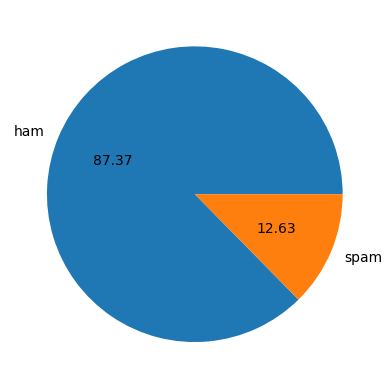

In [94]:
import matplotlib.pyplot as plt
plt.pie(dataset['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')

conculsion : data is imbalanced 

In [95]:
# create new addition columns aplhabets, words, and sentence
from nltk.tokenize import word_tokenize, sent_tokenize

In [96]:
dataset['lenght'] = dataset['message'].apply(len) # adding new colmn sentence length

In [97]:
dataset['words'] = dataset['message'].apply(lambda x : len(word_tokenize(x))) # adding new column words

In [98]:
dataset['sentences'] = dataset['message'].apply(lambda x : len(sent_tokenize(x))) # add new column sentences

In [99]:
dataset.sample(5)

,target,message,lenght,words,sentences
391,0,Hey so this sat are we going for the intro pil...,80,18,2
2356,0,No..he joined today itself.,27,7,1
1926,0,Dont give a monkeys wot they think and i certa...,135,33,3
516,1,Boltblue tones for 150p Reply POLY# or MONO# e...,146,39,6
2609,0,"Awesome, text me when you're restocked",38,8,1


In [100]:
# separate describe for ham and spam 
# hisplot to compare length of ham and spam length
# finding the correlation

array([[<Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'lenght'}>],
       [<Axes: title={'center': 'words'}>,
        <Axes: title={'center': 'sentences'}>]], dtype=object)

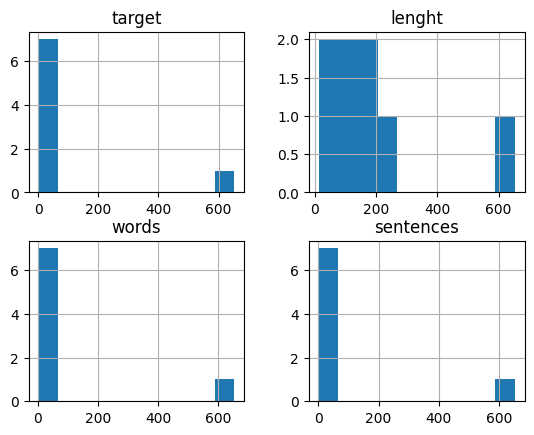

In [101]:
dataset[dataset['target'] == 1].describe().hist()

array([[<Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'lenght'}>],
       [<Axes: title={'center': 'words'}>,
        <Axes: title={'center': 'sentences'}>]], dtype=object)

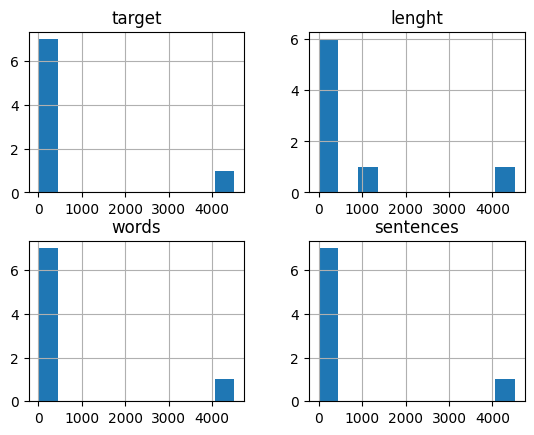

In [102]:
dataset[ dataset['target'] == 0 ].describe().hist()

<Axes: ylabel='Count'>

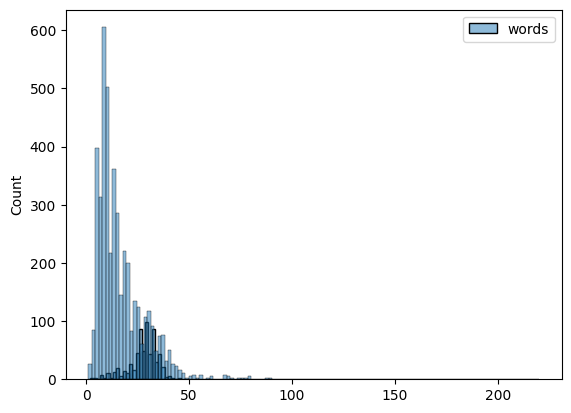

In [103]:
import seaborn as sns

sns.histplot(dataset[dataset['target']==1][['words']], color='green')
sns.histplot(dataset[dataset['target']==0][['words']])

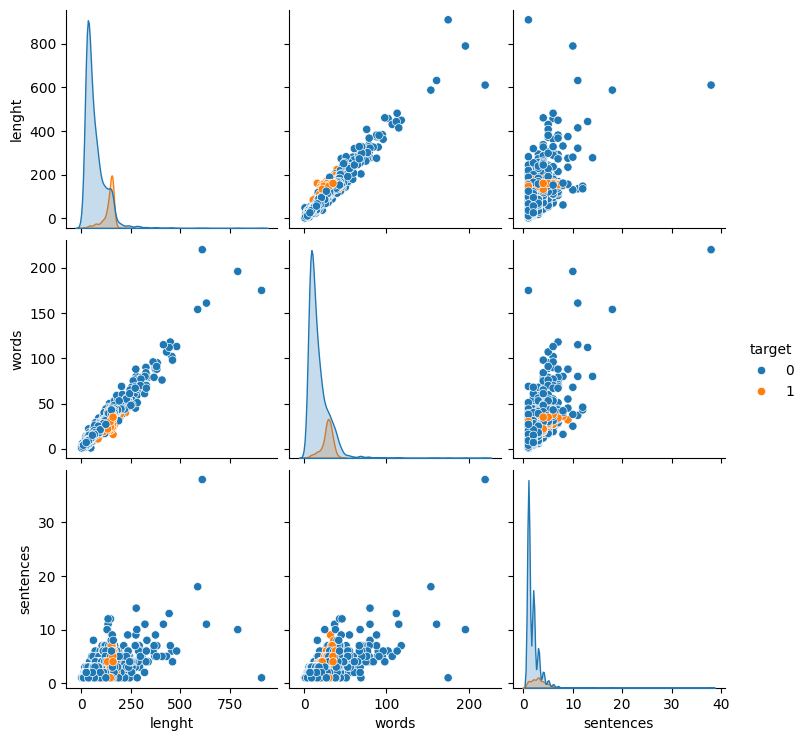

In [104]:
# find the cofficient
sns.pairplot(dataset, hue='target')

<Axes: >

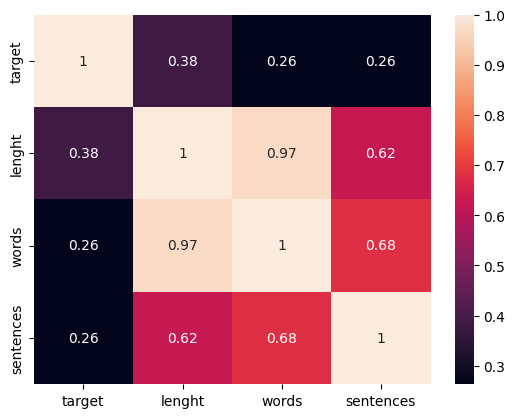

In [105]:
corr = dataset.select_dtypes(include=[int, float]).corr()

sns.heatmap(corr, annot=True)

In [106]:
# here we can conclude that three column highly correlated to each other 
# now we will chose the column with the highest correlation with the target value

# Data Preprocessing
1. lower case
2. tokenization
3. Remove specical character
4. Remove stop words from punctuation
5. stemming 

In [107]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer, SnowballStemmer
import spacy

sw = stopwords.words('english') # get all the stop words
punc = string.punctuation

# stemmer
ps = PorterStemmer()
sbs = SnowballStemmer(language='english')

# load spacy model
nlp = spacy.load("en_core_web_sm")


# implement poster stemming . 
def transorm_text_1(text):

    # convert into tokens 
    text = text.lower()
    text = word_tokenize(text)
    
    # remove special characters  
    y = []
    for i in text :
        if str(i).isalnum():
            y.append(i)
    
    # remove stropwords and punctuations 
    text = y[:]
    y.clear()

    # removing the stop words and punctions
    for i in text:
        if i not in sw and i not in punc :
            y.append(i)

    # use stemming
    text = y[:]
    y.clear()

    for i in text :
        y.append(ps.stem(i))

    return " ".join(y)

# implement poster stemming . 
def transorm_text_2(text):

    # convert into tokens 
    text = text.lower()
    text = word_tokenize(text)
    
    # remove special characters  
    y = []
    for i in text :
        if str(i).isalnum():
            y.append(i)
    
    # remove stropwords and punctuations 
    text = y[:]
    y.clear()

    # removing the stop words and punctions
    for i in text:
        if i not in sw and i not in punc :
            y.append(i)

    # use stemming
    text = y[:]
    y.clear()

    for i in text :
        y.append(sbs.stem(i))

    return " ".join(y)

# implement lemetizing . 
def transorm_text_3(text):

    # convert into tokens 
    text = text.lower()
    text = word_tokenize(text)
    
    # remove special characters  
    y = []
    for i in text :
        if str(i).isalnum():
            y.append(i)
    
    # remove stropwords and punctuations 
    text = y[:]
    y.clear()

    # removing the stop words and punctions
    for i in text:
        if i not in sw and i not in punc :
            y.append(i)

    # use stemming
    text = y[:]
    y.clear()

    for i in text :
        y.append(sbs.stem(i))

    text = " ".join(y)

    # Process the text
    doc = nlp(text)

    lemmas = [token.lemma_ for token in doc]

    return " ".join(lemmas)

print(transorm_text_1('i loved the youtube lectures how about you go goa gone ')) 
print(transorm_text_2('i loved the youtube lectures how about you go goa gone '))
print(transorm_text_3('i loved the youtube lectures how about you go goa gone '))

love youtub lectur go goa gone
love youtub lectur go goa gone
love youtub lectur go goa go


In [108]:
dataset['message new'] = dataset['message'].apply(transorm_text_3)

making a words could to analyse which message is repeating again and again

In [113]:
# in spam message which are the top 30 words which is repeating more frequently 
spam_corpus = []
for message in dataset[dataset['target'] == 1]['message new'].tolist():
    for words in message.split():
        spam_corpus.append(words)

In [114]:
len(spam_corpus)

9978

In [121]:
from collections import Counter

pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['words','frequency'])

,words,frequency
0,call,320
1,free,191
2,2,155
3,txt,130
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


<Axes: xlabel='words', ylabel='frequency'>

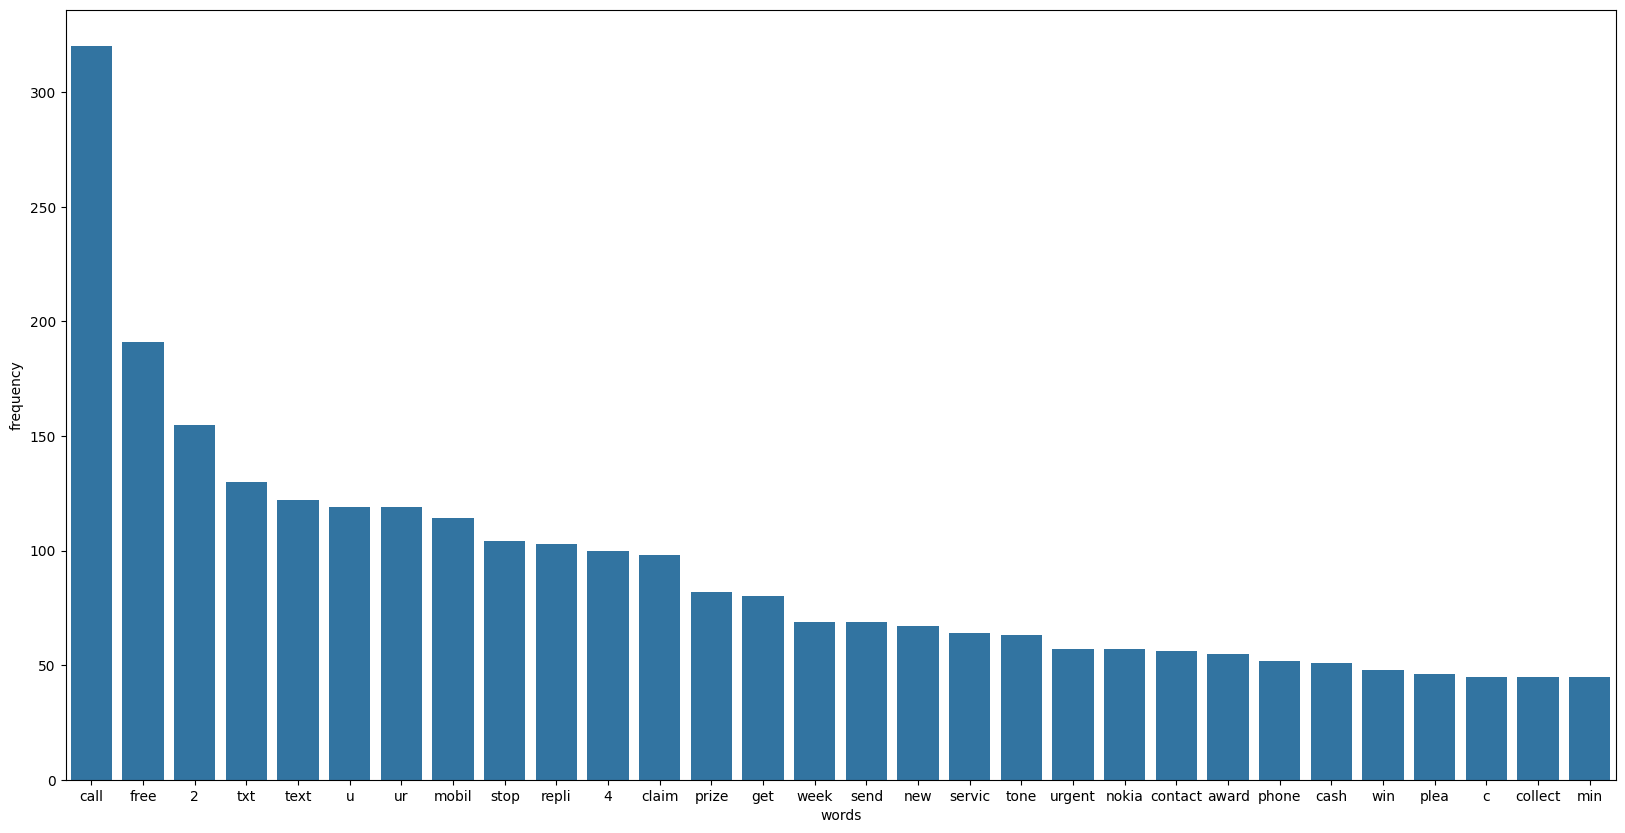

In [126]:
plt.figure(figsize=(20,10))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['words','frequency'])['words'], y= pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['words','frequency'])['frequency'])

# Model Building

In [145]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [146]:
x = tfidf.fit_transform(dataset['message new']).toarray()

In [147]:
x.shape

(5169, 6583)

In [148]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [149]:
y = dataset['target'].values

In [150]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [151]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [152]:
# apply naive bias because it is well known that textual data working better with the textual data

In [153]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [154]:
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(f"accuracy score : {accuracy_score(y_test, y_pred)}")
print(f'confusion matrix : {confusion_matrix(y_test, y_pred)}')
print(f'precision score : {precision_score(y_test, y_pred)}')

accuracy score : 0.8694390715667312
confusion matrix : [[785 111]
 [ 24 114]]
precision score : 0.5066666666666667


In [155]:
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)
print(f"accuracy score : {accuracy_score(y_test, y_pred)}")
print(f'confusion matrix : {confusion_matrix(y_test, y_pred)}')
print(f'precision score : {precision_score(y_test, y_pred)}')
# data is imbalance so precision matters 

accuracy score : 0.9593810444874274
confusion matrix : [[896   0]
 [ 42  96]]
precision score : 1.0


In [156]:
bnb.fit(x_train, y_train)
y_pred = bnb.predict(x_test)
print(f"accuracy score : {accuracy_score(y_test, y_pred)}")
print(f'confusion matrix : {confusion_matrix(y_test, y_pred)}')
print(f'precision score : {precision_score(y_test, y_pred)}')

accuracy score : 0.9738878143133463
confusion matrix : [[894   2]
 [ 25 113]]
precision score : 0.9826086956521739


we choose tfidf and choose mnb

# Model Selection with hyper parameter tuning .

In [157]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [176]:
# # Define models and their hyperparameter grids
# models = {
#     "Random Forest": {
#         "model": RandomForestClassifier(random_state=42),
#         "params": {
#             "n_estimators": [50, 100, 200],
#             "max_depth": [None, 10, 20],
#             "min_samples_split": [2, 5, 10]
#         }
#     },
#     "Gradient Boosting": {
#         "model": GradientBoostingClassifier(random_state=42),
#         "params": {
#             "n_estimators": [50, 100, 200],
#             "learning_rate": [0.01, 0.1, 0.2],
#             "max_depth": [3, 5, 7]
#         }
#     },
#     "SVM": {
#         "model": SVC(random_state=42),
#         "params": {
#             "C": [0.1, 1, 10],
#             "kernel": ["linear", "rbf"]
#         }
#     },
#     "Logistic Regression": {
#         "model": LogisticRegression(random_state=42),
#         "params": {
#             "C": [0.1, 1, 10],
#             "solver": ["liblinear", "lbfgs"]
#         }
#     },
#     "K-Nearest Neighbors": {
#         "model": KNeighborsClassifier(),
#         "params": {
#             "n_neighbors": [3, 5, 7],
#             "weights": ["uniform", "distance"]
#         }
#     },
#     "Decision Tree": {
#         "model": DecisionTreeClassifier(random_state=42),
#         "params": {
#             "max_depth": [None, 10, 20],
#             "min_samples_split": [2, 5, 10]
#         }
#     }
# }

# Define models and their hyperparameter grids
models = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [ 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    }
    ,
    # "Gradient Boosting": {
    #     "model": GradientBoostingClassifier(random_state=42),
    #     "params": {
    #         "n_estimators": [50, 100],
    #         "learning_rate": [0.1]
    #     }
    # },
    "SVM": {
        "model": SVC(random_state=42),
        "params": {
            "C": [0.1],
            "kernel": ["linear", "rbf"]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42),
        "params": {
            "C": [0.1],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["distance"]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [10, 20],
            "min_samples_split": [2, 5, 10]
        }
    }
}

In [177]:
# DataFrame to store results
results = pd.DataFrame(columns=["Model", "Best Parameters", "Accuracy", "Precision", "Recall", "F1 Score"])

In [178]:
# Perform hyperparameter tuning and evaluation
for model_name, model_info in models.items():
    print(f"Training {model_name}...")
    
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=model_info["model"],
        param_grid=model_info["params"],
        cv=5,
        scoring="accuracy",
        n_jobs=-1
    )
    
    # Fit the model
    grid_search.fit(x_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(x_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    # Store results in DataFrame
    results = results.assign(**{
        "Model": model_name,
        "Best Parameters": grid_search.best_params_,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }, ignore_index=True)

Training Random Forest...
Training SVM...


KeyboardInterrupt: 

In [ ]:
results

In [179]:
import  pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl','wb'))